In [1]:
import os.path as osp

import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from mlp_training import MLP,TrajectoriesDataset
# from model import Net
from utils.wrapper_panda import PandaWrapper
from utils.param_parsers import ParamParser

from utils.utils_ml import plot_trajs, convert_inputs_outputs_to_trajs


#### Load data ####
results_dir = osp.join((str(osp.abspath(''))), "results")
data_filename = "trajectories_sc2_rs_n1000.pt"
data_path = osp.join(results_dir, "trajectories" ,  data_filename)
data = torch.load(data_path, weights_only=True)

T = 15
nq = 7

# Create dataset
dataset = TrajectoriesDataset(data)
# Paths to the model and data
# hidden_sizes=[128, 128, 64]
# Paths to the model and data
model_file_name = "trajectories_sc2_rs_n1000_model.pth"
model_path = osp.join(results_dir, "models", model_file_name)
# net = MLP(hidden_sizes= hidden_sizes)
net = MLP()

# Load the model state
if osp.exists(model_path):
    net.load_state_dict(torch.load(model_path))
    print("Model loaded successfully.")
else:
    print("Model file does not exist.")
    exit()

# Create dataset and dataloader
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Set the model to evaluation mode
net.eval()


robot_wrapper = PandaWrapper(capsule=True)
rmodel, cmodel, vmodel = robot_wrapper()

yaml_path = "scenes.yaml"
pp = ParamParser(yaml_path, 2)
cmodel = pp.add_collisions(rmodel, cmodel)

### INITIAL q0
q0 = pp.initial_config
targ = pp.target_pose


Model loaded successfully.


/tmp/ipykernel_579970/3475272552.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_path))
/home/arthur/Desktop/Code/WMPC/utils/wrappe

In [7]:
traj_lists = []

for i in range(int(len(data)/20)):
    inputs = data[i][0]
    outputs = data[i][1] 
    traj = convert_inputs_outputs_to_trajs(inputs, outputs)
    traj_lists.append(traj)

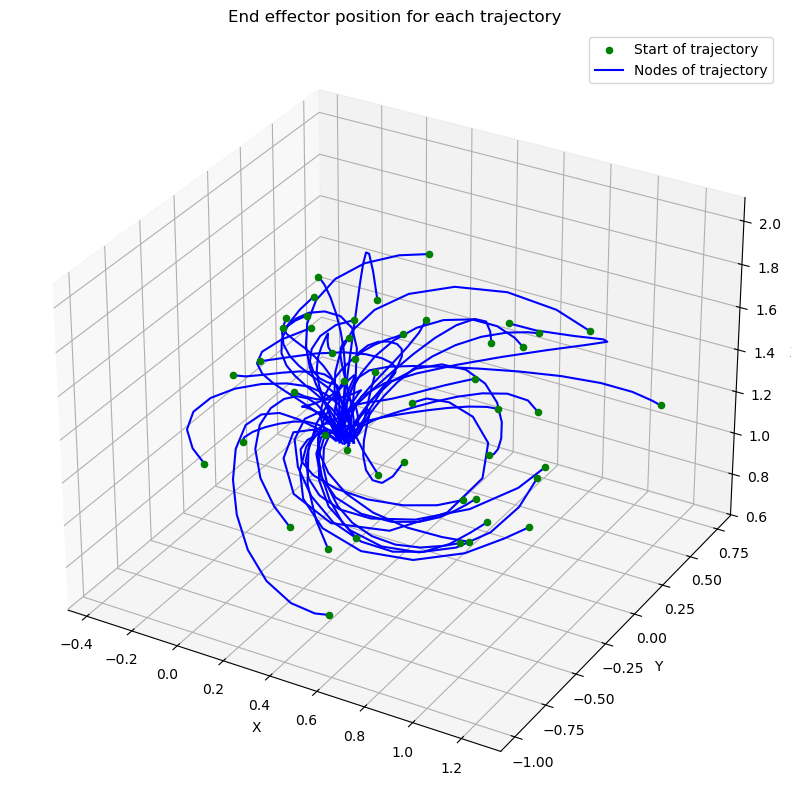

In [8]:
plot_trajs(rmodel, traj_lists)